In [13]:
import argparse
import matplotlib.pyplot as plt

import chainer

from ss2dbbox_dataset import SS2DBboxDataset
from ss2dbbox_dataset import ss2d_bbox_label_names
from chainercv.links import SSD300
from chainercv.links import SSD512
from chainercv import utils
from chainercv.visualizations import vis_bbox


model_file="model7000.npz"

model = SSD300(
    n_fg_class=1,pretrained_model=model_file)

model.to_cpu()

In [14]:
import ss2dbbox_dataset
from chainercv.visualizations import vis_bbox

def predict(model,file,pickle=False,prob=0.5):
  if pickle:
    img = ss2dbbox_dataset.read_image(file, color=True)
  else:  
    img = utils.read_image(file, color=True,alpha='ignore')
  bboxes, labels, scores = model.predict([img])
  bbox, label, score = bboxes[0], labels[0], scores[0]
  x=[]
  y=[]
  z=[]
  for i in range(len(score)):
    if score[i]>prob:
        x.append(bbox[i])
        y.append(label[i])   
        z.append(score[i])
  vis_bbox(
    img, x,y,z, label_names=ss2d_bbox_label_names)

Wall time: 4.42 s


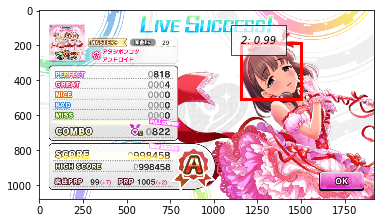

In [17]:
%time predict(model,"val_img/deresute2.png",prob=0.1)